# The two-sticks problem (and some associated geometry)

This notebook discusses the two sticks problem (or theorem), which is sketched out below.  The idea
is to boost our intuitions about the geometry with some visualization code.

Some preliminary code:

In [264]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

# The x-coord of the pole with height L2.  Will be fixed throughout.
# (We move the other pole).
X = 3

def red (x,m2,b2):
    # The y-value on the red line given x 
    # NB m2 and b2 must be defined at execution time
    return (m2*x) + b2

def solve (D,X,L1,L2):
    # Solve for the intersection point of the red & blue lines
    # Blue equation.  
    # NB This functions is vectorized for D.
    # If D is a vector, soln will be  vector of solutions.
    m1 = L2/D
    b1 = (L2-m1*X)
    # Red equation
    m2 = -L1/D
    b2 = L1-(m2*(X-D))
    soln = (b2 - b1)/(m1 - m2)
    return soln,m1,b1,m2,b2
    
def draw_two_sticks_problem(D,X,L1,L2,xs=None,ys=None,cols=2,figsize=(10,5),axes=None,
                           omit_labels=False,draw_intersection_point=False,
                           draw_pq=True,l1_color='r',l2_color='b',reverse=False,
                           connect_tops=False,save=False):
    """
    Draw the two sticks problem for a particular value
    of D in each axis. After first axis, add D to the current value of D before drawing the exis.
    
    Optionally, when xs and ys are given, draw the 
    location of PQ across a range of D values.
    """
    
    
    if axes is None:
        fig, axes = plt.subplots(1,cols,sharey=True,sharex=True,figsize=figsize)
    
    if isinstance(axes,mpl.axes.Axes):
        figsize, axes, cols = (8,8), [axes], 1
    
    for i in range(cols):
        # increment current D by D
        D *= (i+1)
        # Find xcoord of Q for current D
        soln0,m1,b1,m2,b2 = solve(D,X,L1,L2)
        
        ax = axes[i]
        ax.plot([X-D,X],[0,L2],c=l2_color)
        ax.plot([X-D,X],[L1,0],c=l1_color)

        # 3 vertical lines
        
        ax.plot([X,X],[0,L2],c="k")
        if draw_pq:
            soln_y = red(soln0,m2,b2)
            ax.plot([X-D,X-D],[0,L1],c="k")
            ax.plot([soln0,soln0],[soln_y,0],c="g")
            if connect_tops:
                ax.plot([soln0,soln0],[soln_y,2*soln_y],c="g")
                    
        
        # 1 horizontal line segment (part of y=0)
        ax.plot([X-D,X],[0,0],c='k')

        # Point PQ (P is soln pt for the two equations)
        if draw_intersection_point:
            ax.scatter([soln0],[red(soln0,m2,b2)],c='k',s=30)
            
        if connect_tops:
            ax.plot([X-D,X],[L1,L2],c='k')
    
        ##  Labels for the points
        if not omit_labels:
            ax.annotate("B",
                        xy=(X-D, L1), xycoords='data',
                        xytext=(-2, 2.5), textcoords='offset points')
            ax.annotate("A",
                        xy=(X-D, 0), xycoords='data',
                        xytext=(-2, -8.5), textcoords='offset points')
            if connect_tops:
                p_x_offset = -7
            else:
                p_x_offset = -4
            ax.annotate("P",
                        xy=(soln0, red(soln0,m2,b2)), xycoords='data',
                        xytext=(p_x_offset, 5.5), textcoords='offset points')
            ax.annotate("D",
                        xy=(X, L2), xycoords='data',
                        xytext=(-2, 2.5), textcoords='offset points')
            ax.annotate("C",
                        xy=(X, 0), xycoords='data',
                        xytext=(-2, -8.5), textcoords='offset points')
            ax.annotate("Q",
                        xy=(soln0, 0), xycoords='data',
                        xytext=(-4, -8.5), textcoords='offset points')
            if connect_tops:
                ax.annotate("Q'",
                        xy=(soln0, 2*red(soln0,m2,b2)), xycoords='data',
                        xytext=(-4, 7.5), textcoords='offset points')

        
        if xs is not None and ys is not None:
            #Draw the dashed line indicating a range of values for P
            ax.plot(xs,ys,c='k',linestyle="dotted")
        
        if save:
            plt.savefig("two_sticks.png")
            
def book_title (ax, color="k"):
           ax.annotate("Python for Social Science", (-11.5, 4.25),
                      fontsize=24,color=color,
                     )
           ax.annotate("Jean Mark Gawron", (-9, 3.8),
                      fontsize=18, color=color,
                     )

def make_image_array (fig):
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    return data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

Consider the figure below:

Let BA and DC be sticks of fixed heights and let AC be the line connecting their bases. We vary D, the length of AC, as shown in the figure, and draw BC (red line) and AD (blue line), Letting P be the
point at which the blue and red lines intersect.  It is an interesting fact that the height of P (green line PQ in the figure) is fixed.

Note: The problem discussed here is an important geometric theorem.  In addition to the name used here, the two sticks problem, tt is sometimes also called the crossed ladders problem
.

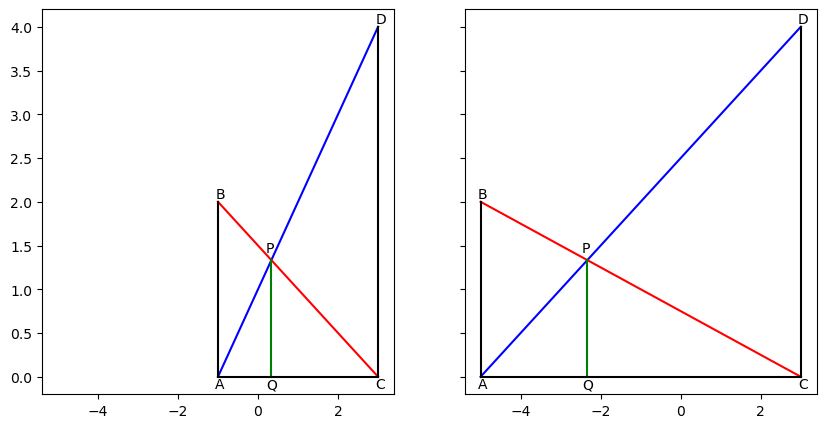

In [109]:
# The height of the two poles
L1, L2 = 2,4
#  The distance between the two poles;  incremented in the 2nd plot
D = L2
mpl.style.use('default')
draw_two_sticks_problem(D,X,L1,L2,cols=2)

Proof
-------

NB:  This is adapted from the proof on the [Art of Problem Solving Website.](https://artofproblemsolving.com/wiki/index.php/Two_poles_formula#:~:text=The%20two%20pole%20formula%2Ftheorem,distance%20between%20the%20two%20poles) 

![Two sticks](https://raw.githubusercontent.com/gawron/python-for-social-science/master/numpy/two_sticks.png)

We show that the height of PQ is fixed.

By (a) the similarity of  the right triangle BAC with PQC,
and (b) the similarity of the right triangle DCA with PQA, we have:

$$
\begin{array}[t]{llcl}
(a) & BA/AC & = & PQ/QC  \\
    & BA \cdot QC &=& PQ \cdot AC\\
(b) & DC/AC & = & PQ/(AC - QC)  \\
    & DC \cdot AC - DC \cdot QC & = &PQ \cdot AC\\
    & DC \cdot AC - PQ \cdot AC & = & DC \cdot QC
\end{array}
$$

(a) and (b) together show that:

$$
\begin{array}[t]{ll}
(a') & QC =  (PQ \cdot AC)/BA \\
(b') & QC =  (DC \cdot AC - PQ \cdot AC)/ DC = ((DC  - PQ)\cdot AC)/ DC \\
\end{array}
$$

Hence 

$$
\begin{array}[t]{ll}
(c) & (PQ \cdot AC)/BA = ((DC  - PQ )\cdot AC)/ DC \\
(d) & PQ/BA = (DC  - PQ )/ DC \\
\end{array}
$$

In (c) we have an equation that contains AC, the distance between the two sticks,
which is what is being varied, but that cancels out and so in (d) 
we have PQ alone with BA and DC,
the given stick-lengths.

So  we solve for PQ:

$$
\begin{array}[t]{lcl}
PQ \cdot DC & = &  (DC  - PQ )\cdot BA \\
PQ \cdot DC & = & DC \cdot BA  - PQ \cdot BA  \\
PQ \cdot DC + PQ \cdot BA & = & DC \cdot BA \\
PQ \cdot (DC + BA)& = &DC \cdot BA \\
PQ & = & (DC \cdot BA)/(DC + BA)  \\
\end{array}
$$

Since BA and DC do not vary, we have shown that the height of PQ is fixed, and
that it can be expressed as a simple function of the
heights of the two sticks.  In fact, it is one-half their harmonic mean.

We demonstrate the result in the plot below,
which varies D while holding the pole length L1 and L2 fixed.  The dotted line represents the location
of PQ across a range of D values.

((L1*L2)/(L1+L2))=1.4286



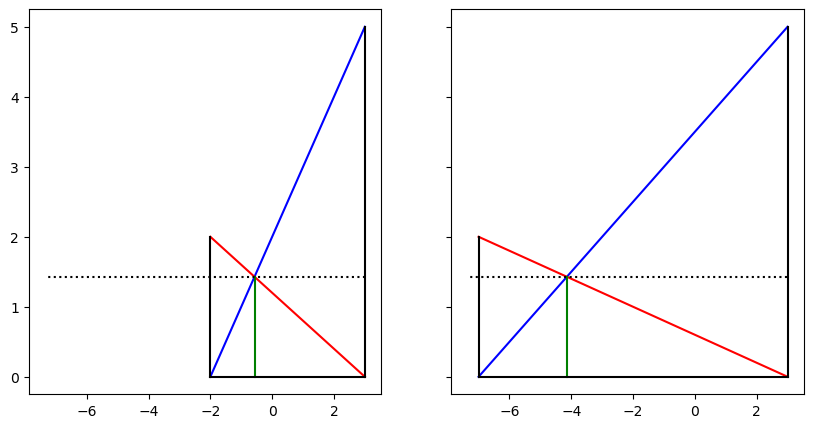

In [4]:
import numpy as np

# D=Distance bertween two sticks, L1,L2,their heights
# Vary D param

L1,L2 = 2,5

# The height of PQ according to the formula deduced above
print(f"{((L1*L2)/(L1+L2))=:.4f}",end="\n\n")

# A range of D-values
Ds = np.arange(.01,15.01,.5)
# Compute the x-coord of Q across a range of D values
# by solving for the intersection point of the two lines.
Qs,m1,b1,m2,b2 = solve (Ds,X,L1,L2)
# Compute the corresponding y-coord of the Ps
Ps = red(Qs,m2,b2)

D=5
draw_two_sticks_problem(D,X,L1,L2,xs=Qs,ys=Ps,omit_labels=True)

Note that nothing about the proof made use of the fact that the similar triangles were right triangles.  What was needed was simply that the two sticks be parallel  (more particularly, that PQ be parallel to both sticks,
entailing that they are parallel to each other).  So the result extends to any pair of parallel sticks,
whether they are upright or not.  For an immediate application of this idea, add a line connecting the tops
of the two sticks:

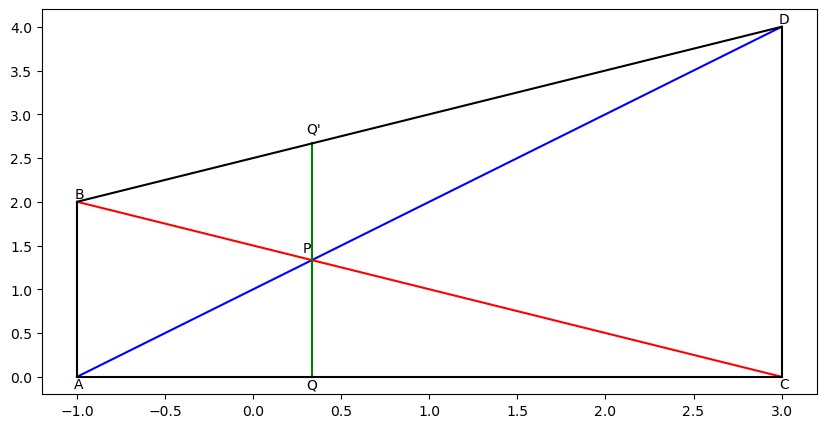

In [108]:
draw_two_sticks_problem(D,X,L1,L2,cols=1,connect_tops=True,omit_labels=False)

Now the same argument that worked for PQ works for PQ', except that the similar triangles are not right triangles,
because BD does meet either of the sticks at a right angle.
Moreover, the calculation of the length of PQ' gives exactly the same result, and since PQ is half the harmonic mean of the lengths of the two sticks, QQ' is exactly
the harmonic mean.  

If we now call the two sticks by their
geometric names, the parallel sides of trapezoid ABCD,
we see that we have proved a theorem about trapezoids: Let AB and CD be the parallel sides
of trapezoid ABCD.  Draw
a line parallel  to  AB and CD through the intersection of the diagonals.  Call the
the points where the line intersects the sides AC and BD Q and Q'. The length of QQ'
is the harmonic mean of the lengths of AB and CD.

A more dramatic illustration of the two-sticks theorem. Just draw the sequence of intersecting lines as D increases.  The horizontal line made by intersection points is quite clear.

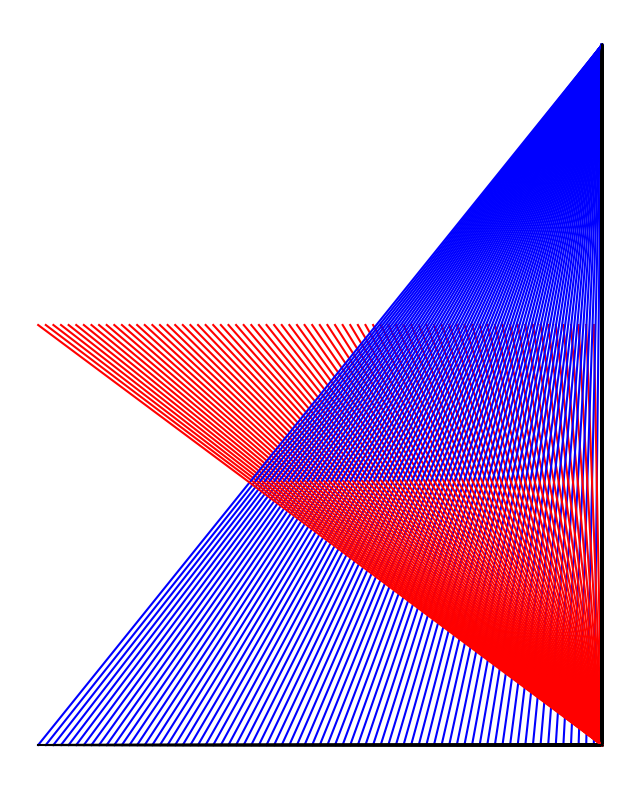

In [265]:
import matplotlib as mpl
#styles = sorted(mpl.style.available)
#favs 'grayscale' 'dark_background' 'default' 'bmh'

Ds = np.arange(.01,15.01,.2)
X,L1,L2 =  3, 3, 5
add_title,make_image_array_flag = False,True
image_style="default"
# Temporarily switch matplotlib style.
with mpl.style.context(image_style):
    fig, axes = plt.subplots(1,1,figsize=(8,10))
    plt.axis('off')
    if add_title:
        book_title(axes)
    for D in Ds:
        draw_two_sticks_problem(D,X,L1,L2,axes=axes,omit_labels=True,draw_pq=False)
    if make_image_array_flag:
        data = make_image_array (fig)
        #fig.canvas.draw()
        #data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        #data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    if add_title:
        #savefig options
        #dpi can be used to set the resolution of the file to a numeric value.
        #transparent can be set to True, which causes the background of the chart to be transparent.
        #bbox_inches specifies the size of the bounding box (whitespace) around the output image. 
        #If no bounding box is desired, try bbox_inches='tight'
        #If bbox_inches == 'tight', then the pad_inches option specifies the amount of padding around the image.
        plt.savefig("Python_for_SS_cover.png")

In [71]:
import os.path
os.getcwd()

'/Users/gawron/Desktop/src/sphinx/python_for_ss_extras/colab_notebooks/python-for-social-science/numpy'

Change the style, line colors:

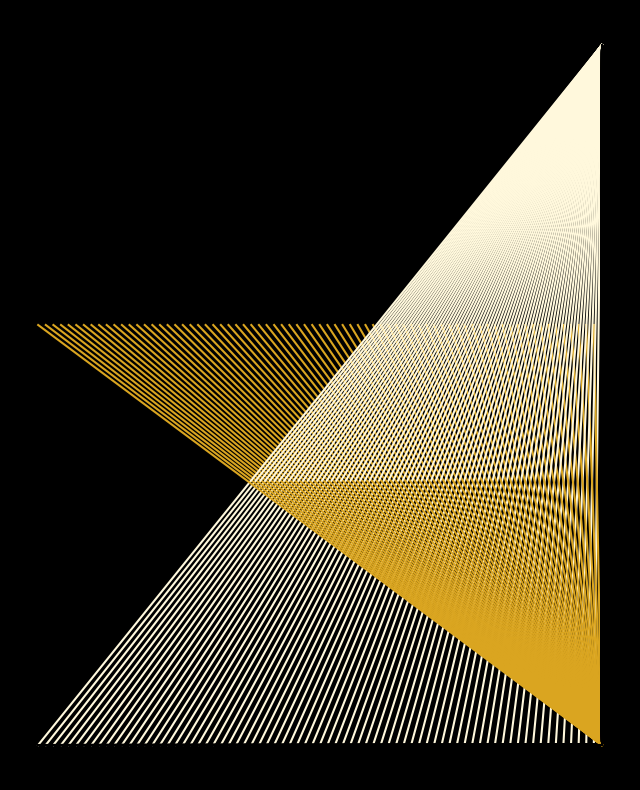

In [270]:
#l1_color,l2_color="paleturquoise","teal"
#mpl.style.use('dark_background')
l1_color,l2_color="goldenrod","cornsilk"
#text_color = "yellow"
text_color = "white"
add_title,make_image_array_flag = False,True
image_style="dark_background"
#l1_color,l2_color="steelblue","indianred"
#l1_color,l2_color="steelblue","lightgray"
#l1_color,l2_color="steelblue","lightskyblue"
#l1_color,l2_color="xkcd:cornflower blue","royalblue"
Ds = np.arange(.01,15.01,.2)
with mpl.style.context(image_style):
    fig, axes = plt.subplots(1,1,figsize=(8,10))
    plt.axis('off')
    if add_title:
        book_title(axes, color=text_color)
    X,L1,L2 =  3, 3, 5
    for D in Ds:
        draw_two_sticks_problem(D,X,L1,L2,axes=axes,omit_labels=True,draw_pq=False,
                               l1_color=l1_color,l2_color=l2_color,save=True)
    if make_image_array_flag:
        data = make_image_array(fig)
        #fig.canvas.draw()
        #data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        #data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#### Reflect and superimpose on original image.

In the code above with `make_image_array == True`
we make a `numpy` matrix of the image using this idea from
[Stackoverflow.](https://stackoverflow.com/questions/7821518/save-plot-to-numpy-array).

We'll use that array to do some very elementary image manipulation.

```
import matplotlib.pyplot as plt
import numpy as np

# Make a random plot...
fig = plt.figure()
fig.add_subplot(111)

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array. We get a flat 1D array we need to reshape.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
# Get pixel dimensions, we want height,width
pixel_shape = fig.canvas.get_width_height()[::-1] 
# The image wil be RGB colors, one height X width layer for each of 3 colors
im_shape = pixel_shape + (3,)
# reshape data into 3D array (three color layers)
data = data.reshape(im_shape)
```

#### Reversing the image

Technicallly what we'll do is reflect  the image on the y-axis.

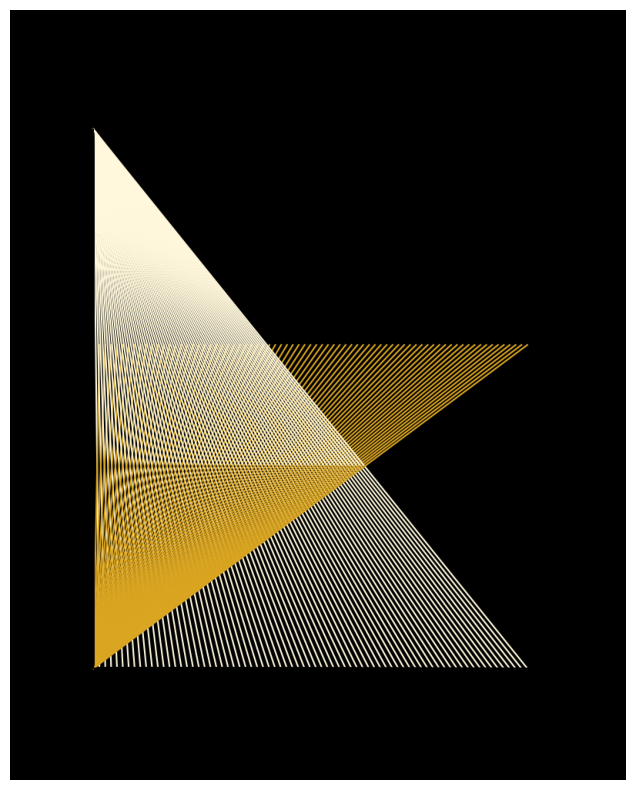

In [263]:
im = data
im_r = im[:,::-1,:]
fig, axes = plt.subplots(1,1,figsize=(8,10))
plt.axis('off')
plt.imshow(im_r,figure=fig)

#### Reversing the image in some color layers and superimposing

In [177]:

im = data
print(im.shape)
# Decompose image into color layers, reversing some
layer0 = im[:,::,0][:,:,np.newaxis]
layer1 = im[:,::-1,2][:,:,np.newaxis]
layer2 = im[:,::-1,2][:,:,np.newaxis]
# Recompose image
im_r = np.concatenate([layer0,layer1,layer2],axis=2)
im_r.shape

(1000, 800, 3)

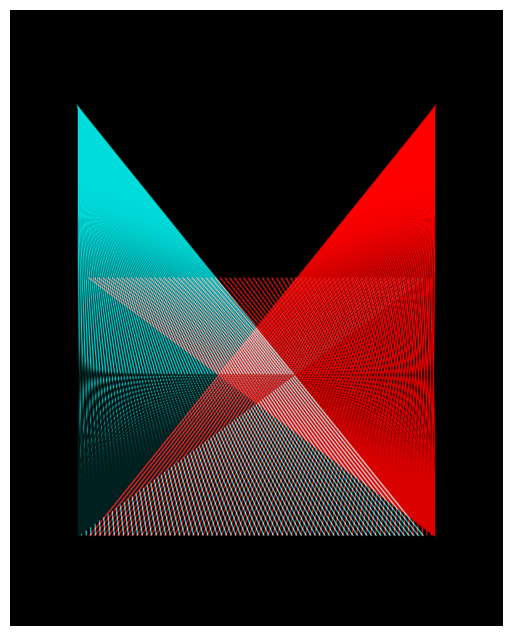

In [178]:
fig, axes = plt.subplots(1,1,figsize=(8,8))
plt.axis('off')
#im = plt.imread('two_sticks.png')
#plt.imshow(im,figure=fig)
#plt.imshow(im[:,::-1][:,:,2],figure=fig)
plt.imshow(im_r,figure=fig)

####  Using `np.where` to reverse the entire image

In the last example we decomposed an image into its color layers,
reversed some layers and put the layers back together.

Next, we're going to try to superimpose a reversal of the complete image (`im_r` on the original image (`im`).
To do the superimposition with a dark background,
we're going to need the greatest lower bound of `im` and `im_r` (a new
image `im2`, such that `im2[i,j,k] = max(im[i,j,k], im_r[i,j,k])`). 

To compute that, we'll use `np.where`.

`np.where` takes 3 arrays of the same shape as arguments (and if they're
not of the same shape, one or more of them will be broadcast into a matching shape,
if possible).

```
>>> np.where(condition,arrayA,arrayB)
W
```

Here `condition` is a Boolean array; `W`, the array returned, is  an array of the same shape,
whose values depend on where `condition` is `True`. If `condition[i,j]` is True, `W[i,j]` is `arrayA[i,j]`;
otherwise `W[i,j`] is `arrayB[i,j]`.

The most common use of `np.where`:  Condition `C` is a condition on `a`. For example, `np.where(C,a,0)` returns an array just like `a`, except that the values that don't meet condition `C` are zeroed out.

In [179]:
a =np.arange(15)

b = np.where(a>=5,a,0)
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  0  0  0  0  5  6  7  8  9 10 11 12 13 14]


To take the least upper bound of `im` and `im_r` , we need

```
np.where(im>im_r,im,im_r)
```

Note: You might think that you could do this with `np.max(im,im_r)`, but `np.max()` takes
just a single array  argument.

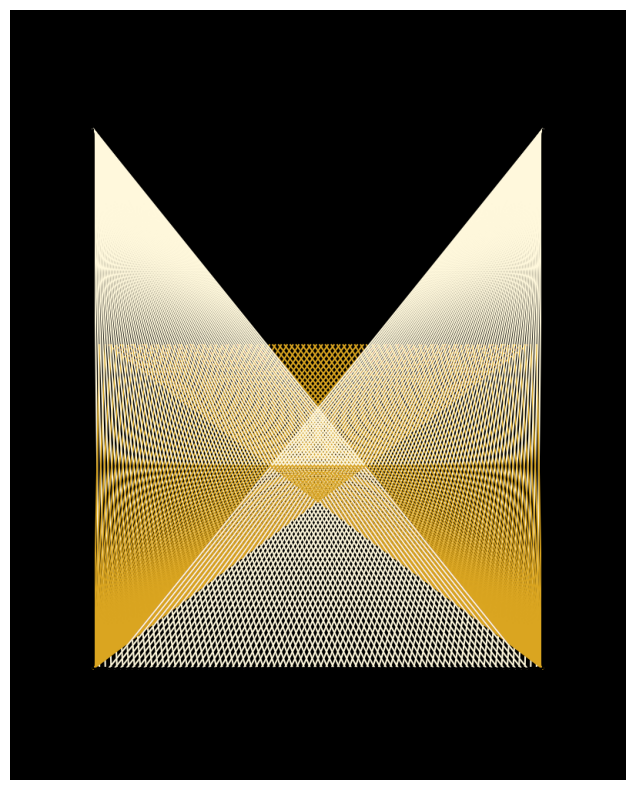

In [268]:
# Data is the numpy image matrix built from the last plot we executed

im = data
im_r = im[:,::-1,:]

# NB 
# For dark_background bg is array([0, 0, 0], dtype=uint8)       = Black
# For default         bg is array([255, 255, 255], dtype=uint8) = White
# For grayscale       bg is array([191, 191, 191], dtype=uint8) = Gray

# We want the background (BG) to lose out wherever there is non BG color.
# Therefore
# For default style (white background) we want the glb (<)
# For dark_background we want lub (>)
# For gray lub (<)  mostly works

if image_style == "dark_background":
    im2 = np.where(im>im_r,im,im_r)
elif image_style in ["default",'grayscale','fivethirtyeight', 'bmh']:
    im2 = np.where(im<im_r,im,im_r)
fig, axes = plt.subplots(1,1,figsize=(8,10))
#im = plt.imread('two_sticks.png')
#plt.imshow((im+im[:,::-1])/2,figure=fig)
#plt.imshow(im,figure=fig)
#plt.imshow(im[:,::-1][:,:,2],figure=fig)
plt.axis('off')
plt.imshow(im2,figure=fig)
#plt.imshow(im,figure=fig)

####  Random stuff from here on out

Do not read further. These examples need to be moved.  They don't relate tp the two sticks problem.

A difficult example to worry about:

[Batman Equation on Quora.](https://www.quora.com/qemail/tc?al_imp=eyJ0eXBlIjogMzMsICJoYXNoIjogIjEwMjExMjk0MTI2MzI1NjIyODR8MXwxfDE0NzAzODkxIn0%3D&al_pri=0&aoid=XfzQa5sqJzq&aoty=1&aty=4&cp=1&et=2&id=e492d6c196d24a01ac79b095858e2dc4&uid=M8fg520JuVY)

In [25]:
import numpy as np

init_x = np.arange(-10.5,10,.1)
init_y = np.arange(-5,6,.1)

#Giving the string ‘ij’ returns a meshgrid with matrix indexing, 
#while ‘xy’ returns a meshgrid with Cartesian indexing.
x, y = np.meshgrid(init_x, init_y, indexing='ij')
z = -5 * (x**2 + y**2)
min_val,max_val = -10**(2),10**(2)
w= (z > min_val)&(z < max_val)
z_to_graph = np.where(w,z,0)

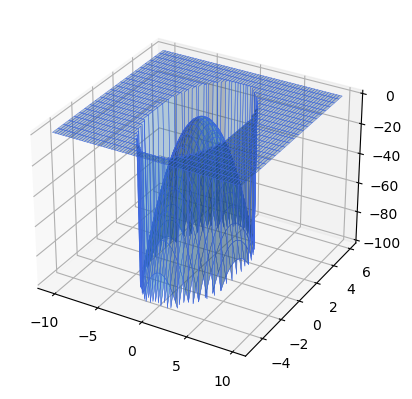

In [26]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x, y, z_to_graph, edgecolor='royalblue', lw=0.3, rstride=3, cstride=5,
                alpha=0.3)

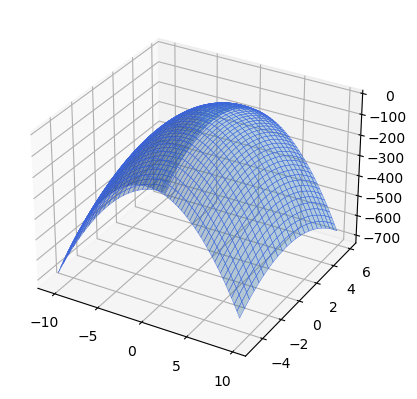

In [108]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x, y, z, edgecolor='royalblue', lw=0.3, rstride=3, cstride=5,
                alpha=0.3)

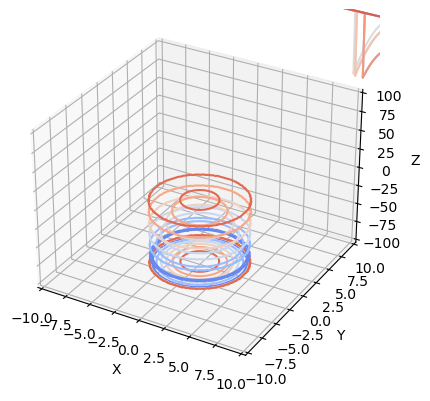

In [111]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
ax.contour(x, y, z_to_graph, cmap=cm.coolwarm)
ax.contour(x, y, z_to_graph, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(x, y, z_to_graph, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(x, y, z_to_graph, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [ ]:
#   With m1,m2,b1,b2 given we may compute approximate solutions as follows:

def approximate_soln (D):
    m1 = L2/D
    b1 = (L2-m1*X)
    def blue (x):
        return (m1*x) + b1
    m2 = -L1/D
    b2 = L1-(m2*(X-D))
    def red (x):
        return (m2*x) + b2
    xx = np.arange(X-D,X,.01)
    rvals = red(xx)
    bvals = blue(xx)
    # Find the idx of the point where the diff between teh 2 eqns is minimal
    soln_idx = np.abs((rvals-bvals)).argmin()
    return xx[soln_idx],m1,b1,m2,b2